In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import os, sys
if os.path.abspath('../ehr2vec') not in sys.path:
    sys.path.append(os.path.abspath('../ehr2vec'))

## Real Scores

In [326]:
import pandas as pd

# Define your data as a dictionary
data_exp = {
    "setting": [
        "FV0_BS0_SEP0", "FV0_BS0_SEP1", "FV0_BS1_SEP0", "FV0_BS1_SEP1",
        "FV1_BS0_SEP0", "FV1_BS0_SEP1", "FV1_BS1_SEP0", "FV1_BS1_SEP1"
    ],
    "pr_auc_mean": [0.54481, 0.56390, 0.57731, 0.59218,0.54345, 0.57156, 0.58224, 0.62291
    ],
    "pr_auc_std": [0.01991, 0.01602, 0.01480, 0.01698,0.01427, 0.01813, 0.00634, 0.01843
    ],
    "roc_auc_mean": [0.92232, 0.93690, 0.94124, 0.94496,0.91700, 0.92321, 0.92467, 0.94721
    ],
    "roc_auc_std": [0.01331, 0.00482, 0.00358, 0.00275,0.01902, 0.02542, 0.01182, 0.00480
]
}

model_exp = {
    "setting": ["CE0T1", "CE1T0", "CE1T1", "CE0T0"],
    "roc_auc_mean": [0.91701, 0.97576, 0.97666, 0.94721],
    "roc_auc_std": [0.00596, 0.00109, 0.00147, 0.00480],
    "pr_auc_mean": [0.51997, 0.78891, 0.79207, 0.62291],
    "pr_auc_std": [0.00933, 0.00761, 0.00972, 0.01843]
}


training_exp  = {
    "setting": [
        "10MRR", "10", "15", "18MRR",
        "18", "20MRR", "20", "30MRR",
        "30", "15MRR"
    ],
    "roc_auc_mean": [
        0.97775, 0.97017, 0.97272, 0.97513,
        0.97425, 0.97768, 0.97867, 0.97513,
        0.97576, 0.97666
    ],
    "roc_auc_std": [
        0.00191, 0.00252, 0.00333, 0.00101,
        0.00161, 0.00139, 0.00182, 0.00270,
        0.00280, 0.00147
    ],
    "pr_auc_mean": [
        0.79378, 0.77004, 0.77254, 0.78494,
        0.77882, 0.80206, 0.80108, 0.78903,
        0.78529, 0.79207
    ],
    "pr_auc_std": [
        0.00807, 0.01266, 0.01103, 0.00834,
        0.01153, 0.01119, 0.01065, 0.01277,
        0.01531, 0.00972
    ]
}

all_results = {'data exp': pd.DataFrame(data_exp), 'model exp': pd.DataFrame(model_exp), 'training exp': pd.DataFrame(training_exp)}
all_results['training exp']['setting'] = pd.Categorical(all_results['training exp']['setting'], ["10", "15", "18", "20", "30", "10MRR", "15MRR", "18MRR", "20MRR", "30MRR"])
all_results['training exp']  = all_results['training exp'].sort_values('setting')
all_results['model exp'].sort_values(by=['setting'], ascending=True, inplace=True)

In [327]:
def apply_function(dfs: dict, func, *args, **kwargs):
    for key in dfs.keys():
        dfs[key] = func(dfs[key], *args, **kwargs)
    return dfs
def compute_lower_bound(df, score='roc_auc'):
    Z = 1.96
    df[f'{score}_lower_95ci'] = df[f'{score}_mean'] - 1.98 * df[f'{score}_std']
    return df
all_results = apply_function(all_results, compute_lower_bound)
all_results = apply_function(all_results, compute_lower_bound, score='pr_auc')

In [328]:
roc_auc_lower_bounds = {key: pd.Series(df.roc_auc_lower_95ci.values,index=df.setting).to_dict() for key, df in all_results.items()}
pr_auc_lower_bounds = {key: pd.Series(df.pr_auc_lower_95ci.values,index=df.setting).to_dict() for key, df in all_results.items()}

# Results overview

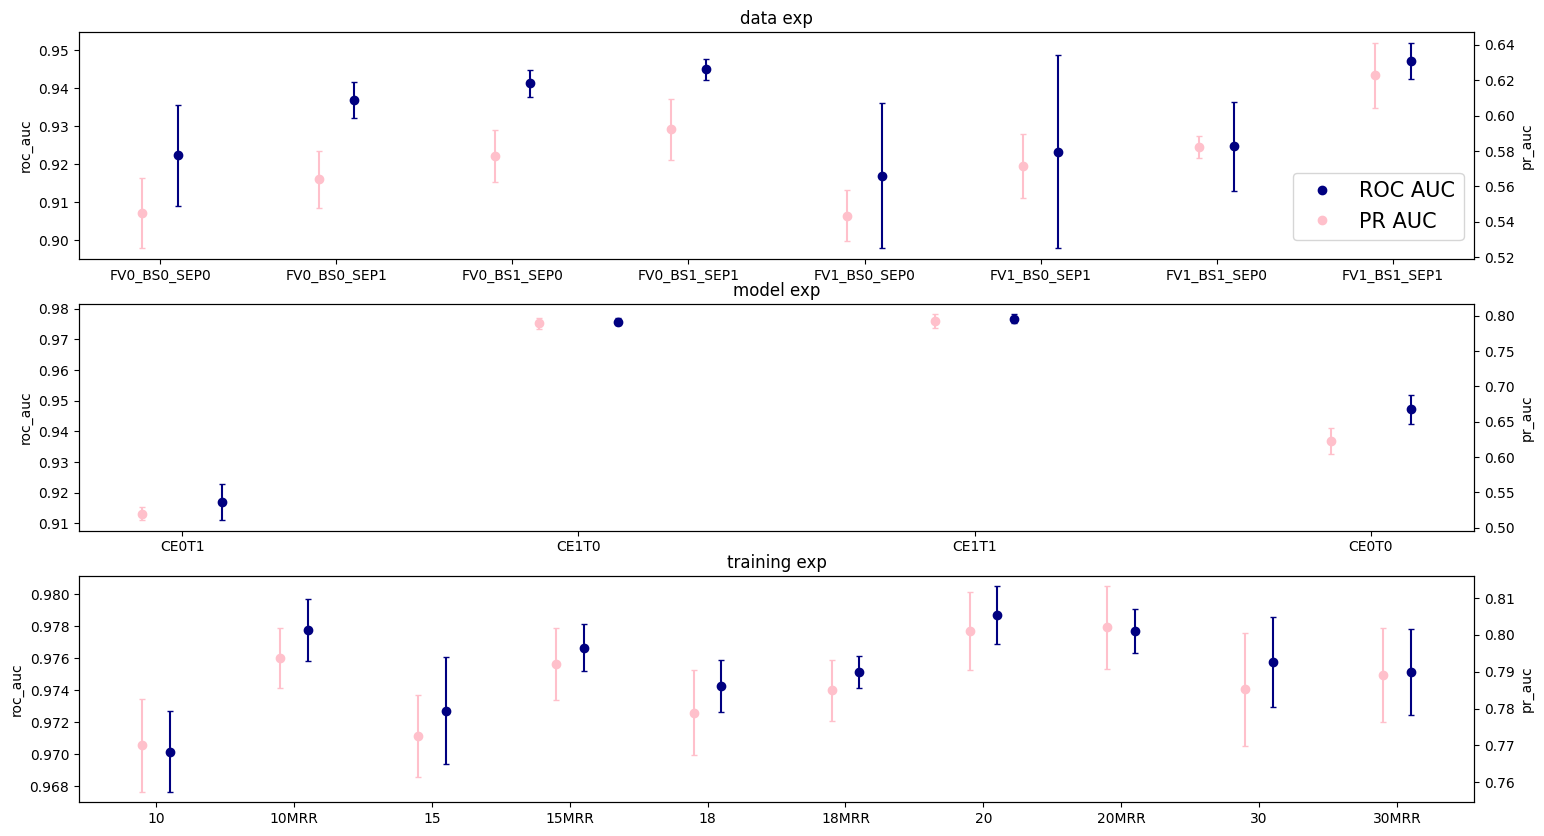

In [194]:
import matplotlib.lines as mlines
fig, axs = plt.subplots(3, 1, figsize=(18, 10))
axs = axs.flatten()
roc_handle = mlines.Line2D([], [], color='navy', marker='o', linestyle='None', label='ROC AUC')
pr_handle = mlines.Line2D([], [], color='pink', marker='o', linestyle='None', label='PR AUC')
for i, ((exp_name, result), ax) in enumerate(zip(all_results.items(), axs)):
    ax.errorbar(np.arange(len(result))+.1   ,result['roc_auc_mean'],  yerr=result['roc_auc_std'],  fmt='o', capsize=2, label='roc_auc', color='navy')
    ax2 = ax.twinx()
    ax2.errorbar(np.arange(len(result))-.1, result['pr_auc_mean'], yerr=result['pr_auc_std'],fmt='o', capsize=2, color='pink', label='pr_auc')
    ax.set_xticks(np.arange(len(result)))
    ax.set_xticklabels(result['setting'])
    ax.set_ylabel('roc_auc')
    ax2.set_ylabel('pr_auc')
    ax.set_title(exp_name)
fig.legend(handles=[roc_handle, pr_handle], loc='upper right', bbox_to_anchor=(.9,.75), bbox_transform=plt.gcf().transFigure, fontsize=15)

## Simple Sunburst

C:\Users\fjn197\AppData\Local\Temp\ipykernel_19864\4150138944.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 0.5, transform=ax.transData._b, color="white", edgecolor='grey')


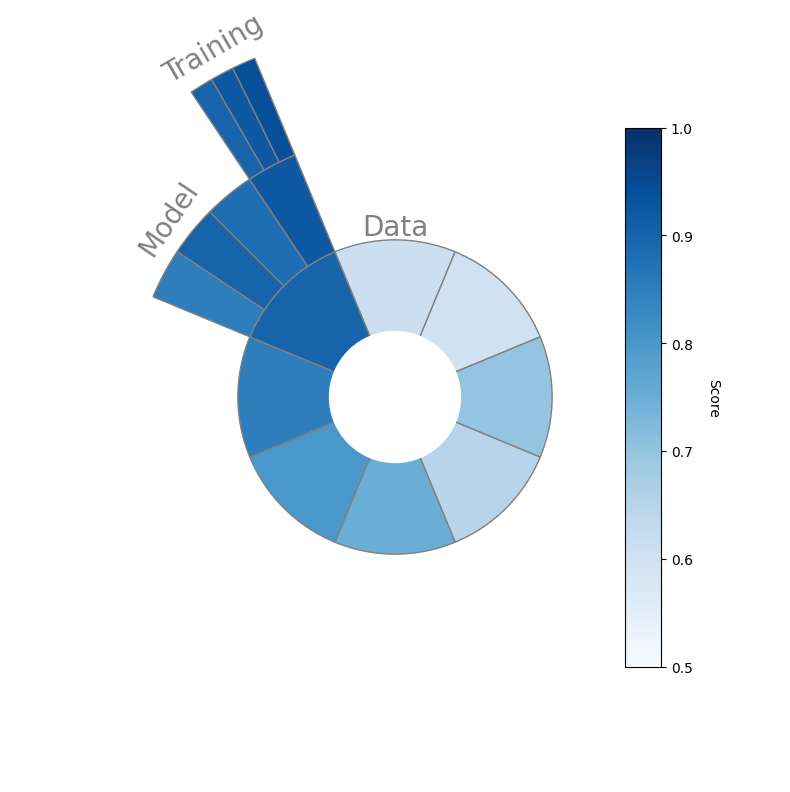

In [224]:

data_scores = np.array([0.61, 0.6, 0.7, 0.65, 0.75, 0.8, 0.85, 0.9])
best_data_index = np.argmax(data_scores)

model_scores = np.array([0.85, 0.9, 0.88, 0.92])
best_model_index = np.argmax(model_scores)
training_scores = np.array([0.9, 0.92, 0.94])

norm = Normalize(vmin=0.5, vmax=1.0)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

width_data = np.pi / 4
angles_data = np.linspace(0, 2 * np.pi, len(data_scores), endpoint=False).tolist()
bars_data = ax.bar(angles_data, [1.2]*len(data_scores), width=width_data, bottom=0, color=plt.cm.Blues(norm(data_scores)), edgecolor='grey')

width_model = width_data / 4
start_angle = angles_data[best_data_index] - np.pi/8 + width_model/2
angles_model = [start_angle + i * width_model for i in range(len(model_scores))]

bars_model = ax.bar(angles_model, [.8]*4, width=width_model, bottom=1.2, color=plt.cm.Blues(norm(model_scores)), edgecolor='grey')

width_training = width_model / 3
start_angle_training = angles_model[best_model_index] - width_model/2 + width_training/2
angles_training = [start_angle_training + i * width_training for i in range(len(training_scores))]

bars_training = ax.bar(angles_training, [.8]*len(training_scores), width=width_training, bottom=2., color=plt.cm.Blues(norm(training_scores)), edgecolor='grey')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=-.2, aspect=15, shrink=.7)
cbar.set_label('Score', rotation=270, labelpad=20)
#cbar.ax.set_yticklabels(['Low', '', '', '', '', 'High'])  # adjust labels if needed

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)  # Remove outer circle
ax.annotate('Data', xy=(0, 0), xytext=(0, 1.3), ha='center', va='center', color='grey', fontsize=20)
ax.annotate('Model', xy=(0, 0), xytext=(-.9, 2.2), ha='center', va='center', color='grey', fontsize=20, rotation=56)
ax.annotate('Training', xy=(0, 0), xytext=(-.48, 3.), ha='center', va='center', color='grey', fontsize=20, rotation=30)
circle = plt.Circle((0, 0), 0.5, transform=ax.transData._b, color="white", edgecolor='grey')
ax.add_artist(circle)
plt.show()

fig.savefig("simple_sunburst.png")

## Multilayered Sunburst

In [330]:
from evaluation import visualization as viz

In [331]:

data_scores = np.array(list(roc_auc_lower_bounds['data exp'].values()))
data_labels = list(roc_auc_lower_bounds['data exp'].keys())
best_data_index = data_labels.index("FV1_BS1_SEP1")# np.argmax(data_scores)
model_scores = np.array(list(roc_auc_lower_bounds['model exp'].values()))
model_labels = roc_auc_lower_bounds['model exp'].keys()
best_model_index = np.argmax(model_scores)
training_scores = np.array(list(roc_auc_lower_bounds['training exp'].values()))
training_labels = roc_auc_lower_bounds['training exp'].keys()

In [332]:

def annotate_bar(ax,annotation, angle, bottom, height):
    ax.annotate(annotation,
                xy=(angle, bottom+height/2),  # theta, radius
                xytext=(angle, bottom+height/2),    # fraction, fraction
                rotation= -angle*180/np.pi,
                color='black',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=FONTSIZE,
                font = FONT
                )
                
def create_bars(ax, B_width, bottom, scores, height, start_angle, annotations = []):
    width  = B_width / len(scores)
    angles = [start_angle + i * width for i in range(len(scores))]
    bars = ax.bar(angles, [height]*len(scores), width=width, bottom=bottom, color=colors(norm(scores)), edgecolor='grey')
    top = bottom + height
    for annotation, angle in zip(annotations, angles):
        annotate_bar(ax, annotation, angle, bottom, height)
    return bars, top, angles



def compute_avg_of_two_consecutive(scores:list)->list:
    return [(scores[i]+scores[i+1])/2 for i in range(0, len(scores)-1,2)]

(1.0, 1.0, 1.0) (0.03529411764705882, 0.4666666666666667, 0.7215686274509804)


C:\Users\fjn197\AppData\Local\Temp\ipykernel_19864\4034423033.py:85: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), WHITE_CIRCLE_RADIUS, transform=ax.transData._b, color="white", edgecolor='k')


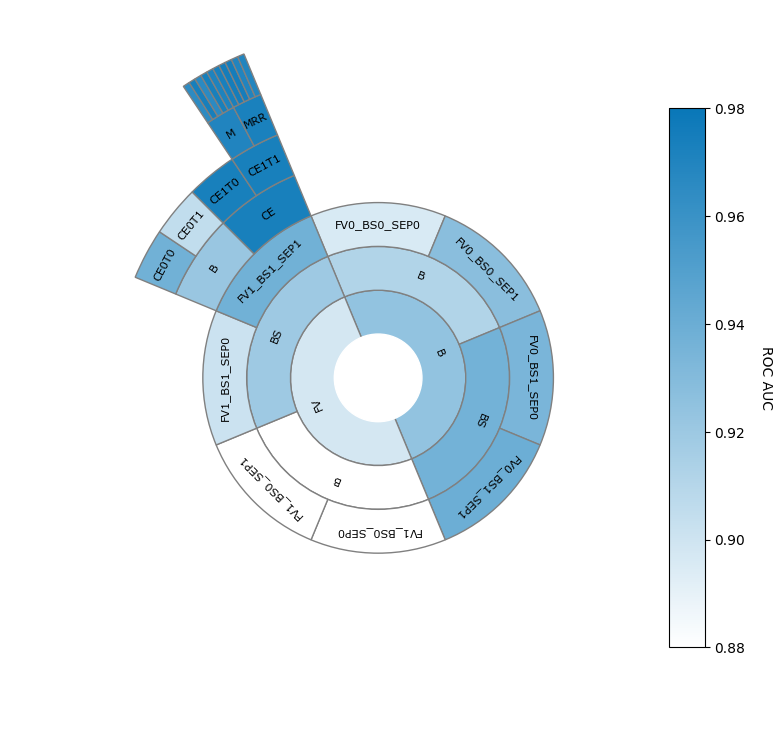

We're going to annotate in inkscape


In [282]:
norm = Normalize(vmin=0.88, vmax=0.98)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
WHITE_CIRCLE_RADIUS = 1
HEIGHT = 1
FONTSIZE = 8
FONT = "Verdana"
colors = viz.define_custom_sequential_colormap(color_start="#FFFFFF", color_end="#0977b8")

inner_second_data_scores = compute_avg_of_two_consecutive(data_scores)
inner_data_scores = compute_avg_of_two_consecutive(inner_second_data_scores)

# New scores for the inner ring with two segments
inner_start_angle = np.pi/8+np.pi/4
angles_inner = np.linspace(inner_start_angle, 2 * np.pi + inner_start_angle, 2, endpoint=False).tolist()
bars_inner = ax.bar(angles_inner, [HEIGHT+WHITE_CIRCLE_RADIUS]*len(angles_inner), width=np.pi, bottom=0, 
                    color=colors(norm(inner_data_scores)), edgecolor='grey')

annotations = ["B", "FV"]
for annotation, angle in zip(annotations, angles_inner):
        annotate_bar(ax, annotation, angle, bottom=WHITE_CIRCLE_RADIUS, height = HEIGHT)

##########################################################################################
inner_start_angle = np.pi/8
angles_inner_second = np.linspace(inner_start_angle, 2 * np.pi + inner_start_angle, 4, endpoint=False).tolist()
bars_inner_second = ax.bar(angles_inner_second, [HEIGHT]*len(angles_inner_second), width=np.pi/2, bottom=HEIGHT+WHITE_CIRCLE_RADIUS, 
                           color=colors(norm(inner_second_data_scores)), edgecolor='grey')
annotations = ["B", "BS", "B", "BS"]
for annotation, angle in zip(annotations, angles_inner_second):
        annotate_bar(ax, annotation, angle, bottom=HEIGHT*1.5+WHITE_CIRCLE_RADIUS, height = 0)


width_data = np.pi / 4
angles_data = np.linspace(0, 2 * np.pi, len(data_scores), endpoint=False).tolist()
bars_data = ax.bar(angles_data, [HEIGHT]*len(data_scores), width=width_data, bottom=HEIGHT*2+WHITE_CIRCLE_RADIUS, 
                   color=colors(norm(data_scores)), edgecolor='grey')

annotations = data_labels 
for annotation, angle in zip(annotations, angles_data):
        annotate_bar(ax, annotation, angle, bottom=HEIGHT*2.5+WHITE_CIRCLE_RADIUS, height = 0 )

##########################################################################################

inner_width_model = width_data / 2
inner_model_start_angle = angles_data[best_data_index]-inner_width_model*.5
inner_model_scores = compute_avg_of_two_consecutive(model_scores)
bars_model_inner, top_model_inner, _ = create_bars(ax, B_width=width_data, bottom=HEIGHT*3+WHITE_CIRCLE_RADIUS, scores=inner_model_scores, 
                                                    height=HEIGHT,start_angle=inner_model_start_angle,
                                                    annotations=["B", "CE"])
width_model = inner_width_model / 2
model_start_angle = angles_data[best_data_index]-width_model*1.5
bars_model, top_model, _ = create_bars(ax, B_width=width_data, bottom=top_model_inner, scores=model_scores, 
                                        height=HEIGHT,start_angle=model_start_angle,
                                        annotations=model_labels)
##########################################################################################

inner_width_training = width_model / 2
inner_training_start_angle = angles_model[best_model_index]-inner_width_training*.5
inner_training_scores = np.array([np.mean(training_scores[:5]), np.mean(training_scores[5:])] )
bars_inner_training, top_inner_training, _ = create_bars(ax, B_width=width_model, bottom=top_model, scores=inner_training_scores, 
                                        height=HEIGHT,start_angle=inner_training_start_angle,
                                        annotations=["M", "MRR"])


width_training = inner_width_training / 10
training_start_angle = angles_model[best_model_index]-width_training*9
bars_training, top_training, _ = create_bars(ax, B_width=width_model, bottom=top_inner_training, scores=training_scores, 
                                        height=HEIGHT,start_angle=training_start_angle,
                                        )
# Colorbar
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=-.1, aspect=15, shrink=.7)
cbar.set_label('ROC AUC', rotation=270, labelpad=20)
#cbar.ax.set_yticklabels(['Low', '', '', '', '', 'High'])  # adjust labels if needed

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)  # Remove outer circle
# ax.annotate('Data', xy=(0, 0), xytext=(0, 1.3), ha='center', va='center', color='grey', fontsize=20)
# ax.annotate('Model', xy=(0, 0), xytext=(-.9, 2.2), ha='center', va='center', color='grey', fontsize=20, rotation=56)
# ax.annotate('Training', xy=(0, 0), xytext=(-.48, 3.), ha='center', va='center', color='grey', fontsize=10, rotation=30)
circle = plt.Circle((0, 0), WHITE_CIRCLE_RADIUS, transform=ax.transData._b, color="white", edgecolor='k')


ax.add_artist(circle)
plt.show()
fig.savefig("sunburst.svg")
print("We're going to annotate in inkscape")

## Rotated

(1.0, 1.0, 1.0) (0.12941176470588237, 0.5176470588235295, 0.7490196078431373)
dict_keys(['10', '15', '18', '20', '30', '10MRR', '15MRR', '18MRR', '20MRR', '30MRR'])


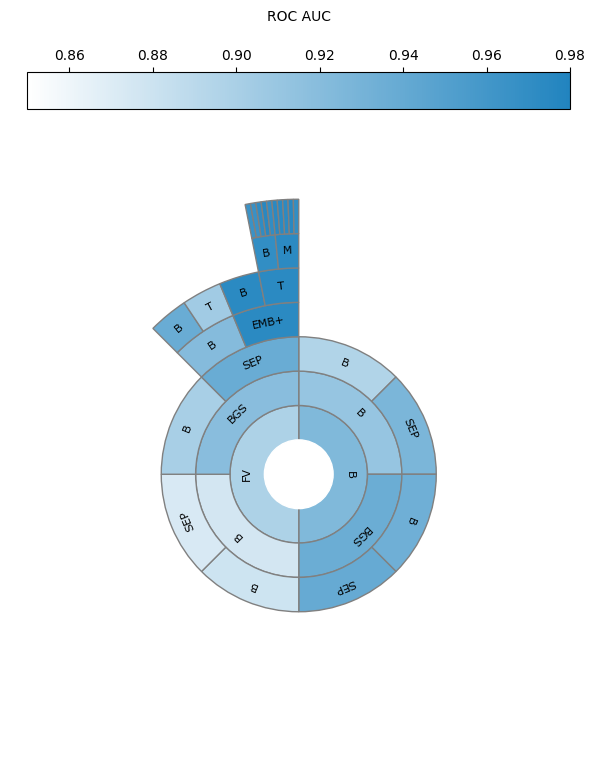

We're going to annotate in inkscape


In [338]:
norm = Normalize(vmin=0.85, vmax=0.98)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
WHITE_CIRCLE_RADIUS = 1
HEIGHT = 1
FONTSIZE = 8
FONT = "Verdana"
colors = viz.define_custom_sequential_colormap(color_start="#FFFFFF", color_end="#2184bf")

inner_second_data_scores = compute_avg_of_two_consecutive(data_scores)
inner_data_scores = compute_avg_of_two_consecutive(inner_second_data_scores)

# New scores for the inner ring with two segments
inner_start_angle = np.pi/2
angles_inner = np.linspace(inner_start_angle, 2 * np.pi + inner_start_angle, 2, endpoint=False).tolist()
bars_inner = ax.bar(angles_inner, [HEIGHT+WHITE_CIRCLE_RADIUS]*len(angles_inner), width=np.pi, bottom=0, 
                    color=colors(norm(inner_data_scores)), edgecolor='grey')

annotations = ["B", "FV"]
for annotation, angle in zip(annotations, angles_inner):
        annotate_bar(ax, annotation, angle, bottom=WHITE_CIRCLE_RADIUS, height = HEIGHT)

##########################################################################################
inner_second_start_angle = inner_start_angle-np.pi/4
angles_inner_second = np.linspace(inner_second_start_angle, 2 * np.pi + inner_second_start_angle, 4, endpoint=False).tolist()
bars_inner_second = ax.bar(angles_inner_second, [HEIGHT]*len(angles_inner_second), width=np.pi/2, bottom=HEIGHT+WHITE_CIRCLE_RADIUS, 
                           color=colors(norm(inner_second_data_scores)), edgecolor='grey')
annotations = ["B", "BGS", "B", "BGS"]
for annotation, angle in zip(annotations, angles_inner_second):
        annotate_bar(ax, annotation, angle, bottom=HEIGHT*1.5+WHITE_CIRCLE_RADIUS, height = 0)


width_data = np.pi / 4
data_start_angle = inner_second_start_angle-width_data/2
angles_data = np.linspace(data_start_angle, 2 * np.pi+data_start_angle, len(data_scores), endpoint=False).tolist()
bars_data = ax.bar(angles_data, [HEIGHT]*len(data_scores), width=width_data, bottom=HEIGHT*2+WHITE_CIRCLE_RADIUS, 
                   color=colors(norm(data_scores)), edgecolor='grey')

annotations = data_labels 
for annotation, angle in zip(annotations, angles_data):
        annotation = "SEP" if annotation.endswith("1") else "B"
        annotate_bar(ax, annotation, angle, bottom=HEIGHT*2.5+WHITE_CIRCLE_RADIUS, height = 0 )

##########################################################################################

inner_width_model = width_data / 2
inner_model_start_angle = angles_data[best_data_index]-inner_width_model*.5
inner_model_scores = compute_avg_of_two_consecutive(model_scores)
bars_model_inner, top_model_inner, angles_model_inner = create_bars(ax, B_width=width_data, bottom=HEIGHT*3+WHITE_CIRCLE_RADIUS, scores=inner_model_scores, 
                                                    height=HEIGHT,start_angle=inner_model_start_angle,
                                                    annotations=["B", "EMB+"])
width_model = inner_width_model / 2
model_start_angle = angles_data[best_data_index]-width_model*1.5
bars_model, top_model, angles_model = create_bars(ax, B_width=width_data, bottom=top_model_inner, scores=model_scores, 
                                        height=HEIGHT,start_angle=model_start_angle,
                                        annotations=["B" if label.endswith('0') else "T" for label in model_labels])
##########################################################################################

inner_width_training = width_model / 2
inner_training_start_angle = angles_model[best_model_index]-inner_width_training*.5
inner_training_scores = np.array([np.mean(training_scores[:5]), np.mean(training_scores[5:])] )
bars_inner_training, top_inner_training, _ = create_bars(ax, B_width=width_model, bottom=top_model, scores=inner_training_scores, 
                                        height=HEIGHT,start_angle=inner_training_start_angle,
                                        annotations=["B", "M"])


width_training = inner_width_training / 10
training_start_angle = angles_model[best_model_index]-width_training*9
bars_training, top_training, _ = create_bars(ax, B_width=width_model, bottom=top_inner_training, scores=training_scores, 
                                        height=HEIGHT,start_angle=training_start_angle,
                                        )
print(training_labels)
# Colorbar
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=.1, aspect=15, shrink=.7, orientation='horizontal', location='top')
cbar.set_label('ROC AUC', rotation=0, labelpad=20)
#cbar.ax.set_yticklabels(['Low', '', '', '', '', 'High'])  # adjust labels if needed

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)  # Remove outer circle
# ax.annotate('Data', xy=(0, 0), xytext=(0, 1.3), ha='center', va='center', color='grey', fontsize=20)
# ax.annotate('Model', xy=(0, 0), xytext=(-.9, 2.2), ha='center', va='center', color='grey', fontsize=20, rotation=56)
# ax.annotate('Training', xy=(0, 0), xytext=(-.48, 3.), ha='center', va='center', color='grey', fontsize=10, rotation=30)
circle = plt.Circle((0, 0), WHITE_CIRCLE_RADIUS, transform=ax.transData._b, color="white", )


ax.add_artist(circle)
plt.show()
fig.savefig("sunburst.svg")
print("We're going to annotate in inkscape")

## Multilayered Sunburst

## Simple Trees

In [ ]:
lines = [
    [(0, 3), (-1, 2)],   # Root to left child
    [(0, 3), (1, 2)],    # Root to right child
    
    [(-1, 2), (-1.5, 1)], # Left child of root to its left child
    [(-1, 2), (-0.5, 1)], # Left child of root to its right child
    
    [(1, 2), (0.5, 1)],   # Right child of root to its left child
    [(1, 2), (1.5, 1)],   # Right child of root to its right child
    
    # For the third layer:
    
    [(-1.5, 1), (-1.75, 0)], # Left child of the left child of root to its left child
    [(-1.5, 1), (-1.25, 0)], # Left child of the left child of root to its right child
    
    [(-0.5, 1), (-0.75, 0)], # Right child of the left child of root to its left child
    [(-0.5, 1), (-0.25, 0)], # Right child of the left child of root to its right child
    
    [(0.5, 1), (0.25, 0)],   # Left child of the right child of root to its left child
    [(0.5, 1), (0.75, 0)],   # Left child of the right child of root to its right child
    
    [(1.5, 1), (1.25, 0)],   # Right child of the right child of root to its left child
    [(1.5, 1), (1.75, 0)]    # Right child of the right child of root to its right child
]


In [14]:
import plotly.graph_objects as go
import numpy as np

# text_dic = { 1:'', 2:'1', 3:'0', 4:'1', 5: '0', 6:'1', 7:'0', 8:'1', 9:'0', 10:'1', 11:'0', 12:'1', 13:'0', 14:'1', 15:'0'}
def plot_binary_tree(node_scores, node_sizes):
    if len(node_scores) != 15 or len(node_sizes) != 15:
        print("Please provide the color and size for all 15 nodes!")
        return

    # Define node positions
    x = [0, -1, 1, -1.5, -0.5, 0.5, 1.5, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75]
    y = [3, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

    # Create node traces
    nodes_trace = go.Scatter(
        x=x,
        y=y,
        mode="markers+text",
        marker=dict(
            size=node_sizes, 
            color=node_scores, 
            colorscale="Blues", # Or any other colorscale
            colorbar=dict(title="ROC AUC"), 
            showscale=True, 
            cmin=0.5,
            cmax=1.0,
            line=dict(width=2,
                                        color='DarkSlateGrey')

        ),
        # text= [text_dic[i] for i in range(1, 16)],  # Label nodes 1-15
        textposition="top center",
        showlegend=False,
    )

    
    fig = go.Figure(nodes_trace)
    # Define lines connecting the nodes
    for idx, (start, end) in enumerate(lines, 1):
        x_values = [start[0], end[0], None]
        y_values = [start[1], end[1], None]
        line_trace = go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color="gray", ),
            showlegend=False,
        )
        fig.add_trace(line_trace)

    fig.add_trace(nodes_trace)
    # Adjust layout settings to remove background and axes
    fig.update_layout(
        plot_bgcolor="rgba(256, 256, 256, 200)", # Transparent background
        paper_bgcolor="rgba(256, 256, 256, 200)", # Transparent surrounding area
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        width= 1000,
        height= 500,
    )
    # annotate with separator
    #fig.add_annotation(x=0, y=1.8, text="Vocab", showarrow=False, yshift=10, font=dict(size=20), )
    #fig.add_annotation(x=0, y=1., text="Background", showarrow=False, yshift=10, font=dict(size=20))
    #fig.add_annotation(x=0, y=.0, text="SEP", showarrow=False, yshift=10, font=dict(size=20))

    fig.show()
    fig.write_image("tree.png")
# Example usage:
scores = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
scores = scores / (np.max(scores)*2) + .5  # Normalize scores to be between 0 and 1
sizes = 15*[30]

plot_binary_tree(scores, sizes)


In [59]:
lines = [
    [(0, 3), (-1, 2)],   # Root to left child
    [(0, 3), (1, 2)],    # Root to right child
    
    [(-1, 2), (-1.5, 1)], # Left child of root to its left child
    [(-1, 2), (-0.5, 1)], # Left child of root to its right child
    
    [(1, 2), (0.5, 1)],   # Right child of root to its left child
    [(1, 2), (1.5, 1)],   # Right child of root to its right child
    
]


In [61]:
import plotly.graph_objects as go
import numpy as np

# text_dic = { 1:'', 2:'1', 3:'0', 4:'1', 5: '0', 6:'1', 7:'0', 8:'1', 9:'0', 10:'1', 11:'0', 12:'1', 13:'0', 14:'1', 15:'0'}
def plot_binary_tree(node_scores, node_sizes):
   
    # Define node positions
    x = [0, -1, 1, -1.5, -0.5, 0.5, 1.5, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75]
    y = [3, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

    # Create node traces
    nodes_trace = go.Scatter(
        x=x,
        y=y,
        mode="markers+text",
        marker=dict(
            size=node_sizes, 
            color=node_scores, 
            colorscale="Blues", # Or any other colorscale
            colorbar=dict(title="ROC AUC"), 
            showscale=True, 
        ),
        # text= [text_dic[i] for i in range(1, 16)],  # Label nodes 1-15
        textposition="top center",
        showlegend=False,
    )

    
    fig = go.Figure(nodes_trace)
    # Define lines connecting the nodes
    for idx, (start, end) in enumerate(lines, 1):
        x_values = [start[0], end[0], None]
        y_values = [start[1], end[1], None]
        line_trace = go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color="gray"),
            showlegend=False,
        )
        fig.add_trace(line_trace)

    fig.add_trace(nodes_trace)
    # Adjust layout settings to remove background and axes
    fig.update_layout(
        plot_bgcolor="rgba(200, 200, 200, 0)", # Transparent background
        paper_bgcolor="rgba(200, 200, 200, 0)", # Transparent surrounding area
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    )
    # annotate with separator
    #fig.add_annotation(x=0, y=1.8, text="Vocab", showarrow=False, yshift=10, font=dict(size=20), )
    #fig.add_annotation(x=0, y=1., text="Background", showarrow=False, yshift=10, font=dict(size=20))
    #fig.add_annotation(x=0, y=.0, text="SEP", showarrow=False, yshift=10, font=dict(size=20))

    fig.show()
    fig.write_image("tree2.png")
# Example usage:
scores = np.array([10, 20, 30, 40, 50, 60, 70])
scores = scores / (np.max(scores)*2) + .5  # Normalize scores to be between 0 and 1
sizes = 7*[30]

plot_binary_tree(scores, sizes)


In [62]:
import plotly.graph_objects as go
import numpy as np

def plot_binary_tree(node_scores, node_sizes):
    if len(node_scores) != 4 or len(node_sizes) != 4:
        print("Please provide the color and size for all 4 nodes!")
        return

    # Define node positions for 1 root and 3 children
    x = [0, -1, 0, 1]
    y = [1, 0, 0, 0]

    # Create node traces
    nodes_trace = go.Scatter(
        x=x,
        y=y,
        mode="markers+text",
        marker=dict(
            size=node_sizes, 
            color=node_scores, 
            colorscale="Blues",
            colorbar=dict(title="ROC AUC"), 
            showscale=True,
        ),
        textposition="top center",
        showlegend=False,
    )

    fig = go.Figure(nodes_trace)

    # Define lines connecting the root to each of the 3 children
    lines = [
        ((x[0], y[0]), (x[1], y[1])),
        ((x[0], y[0]), (x[2], y[2])),
        ((x[0], y[0]), (x[3], y[3]))
    ]

    for idx, (start, end) in enumerate(lines, 1):
        x_values = [start[0], end[0], None]
        y_values = [start[1], end[1], None]
        line_trace = go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color="gray"),
            showlegend=False,
        )
        fig.add_trace(line_trace)

    fig.add_trace(nodes_trace)

    # Adjust layout settings to remove background and axes
    fig.update_layout(
        plot_bgcolor="rgba(200, 200, 200, 0)",  # Transparent background
        paper_bgcolor="rgba(200, 200, 200, 0)",  # Transparent surrounding area
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    )

    fig.show()
    fig.write_image("tree3.png")

# Example usage:
scores = np.array([10, 20, 30, 40])
scores = scores / (np.max(scores)*2) + .5  # Normalize scores to be between 0 and 1
sizes = 4*[30]

plot_binary_tree(scores, sizes)
